# Obesidad de los niños en United Kingdom

En este archivo se analiza la obesidad de niños en UK.

El ejemplo fue tomado de:
https://www.aprenderpython.net/analizando-la-obesidad-de-uk-con-python/

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Para leer los datos usamos:

In [12]:
data = pd.ExcelFile("datasets/obesidad.xls")
print(data.sheet_names)

['Chapter 7', '7.1', '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '7.10']


Para limpiar los datos hacemos

In [13]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)
print(data_age)

   Unnamed: 0    Total  Under 16  16-24   25-34   35-44   45-54   55-64  \
0         NaN      NaN       NaN    NaN     NaN     NaN     NaN     NaN   
1     2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   
2     2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   
3     2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   
4     2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   
5     2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0   
6     2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0   
7     2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0   
8     2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0   
9     2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0   
10    2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0   
11    2012/13  10957.0     556.0  356.0  1437.0  2744.0  3305.0  1965.0   

    65-74  75 and over  

Para renombrar la primera columna

In [14]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)
print(data_age)

       Year    Total  Under 16  16-24   25-34   35-44   45-54   55-64  65-74  \
0       NaN      NaN       NaN    NaN     NaN     NaN     NaN     NaN    NaN   
1   2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   52.0   
2   2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   52.0   
3   2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   36.0   
4   2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   72.0   
5   2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0  118.0   
6   2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0  157.0   
7   2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0  221.0   
8   2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0  378.0   
9   2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0  456.0   
10  2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0  468.0   
11  2012/13  10957.0     556.0  356.0  1

Para eliminar la primera línea vacía usamos:

In [15]:
data_age.dropna(inplace=True)
print(data_age)

       Year    Total  Under 16  16-24   25-34   35-44   45-54   55-64  65-74  \
1   2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   52.0   
2   2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   52.0   
3   2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   36.0   
4   2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   72.0   
5   2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0  118.0   
6   2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0  157.0   
7   2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0  221.0   
8   2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0  378.0   
9   2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0  456.0   
10  2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0  468.0   
11  2012/13  10957.0     556.0  356.0  1437.0  2744.0  3305.0  1965.0  495.0   

    75 and over  
1          23.0  
2  

Par eliminar el índice de la primera columna por el año usamos

In [16]:
data_age.set_index('Year', inplace=True)
print(data_age)

           Total  Under 16  16-24   25-34   35-44   45-54   55-64  65-74  \
Year                                                                       
2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   52.0   
2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   52.0   
2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   36.0   
2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   72.0   
2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0  118.0   
2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0  157.0   
2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0  221.0   
2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0  378.0   
2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0  456.0   
2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0  468.0   
2012/13  10957.0     556.0  356.0  1437.0  2744.0  3305.0  1965.0  495.0   

         75

## Gráficos

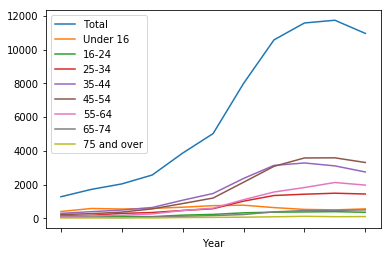

In [17]:
data_age.plot()
plt.show()

Para dibujar sin el total usamos

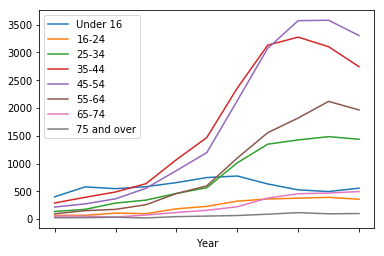

In [21]:
data_age_minus_total = data_age.drop('Total', axis=1)
data_age_minus_total.plot()
 
plt.show()
plt.close()

Analizando los niños por debajo de 16 años y los adultos en un intervalo de edad entre los 35 y los 44.

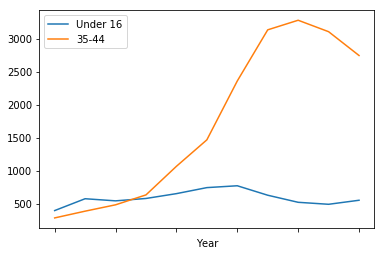

In [24]:
data_age['Under 16'].plot(label="Under 16")
data_age['35-44'].plot(label="35-44")
plt.legend(loc="upper left")
plt.show()
plt.close()

Dibujando la evolución de los niños menores de 16

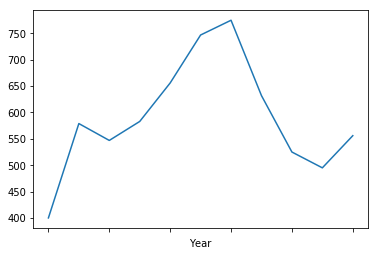

In [40]:
data_age['Under 16'].plot(label="Under 16")
plt.show()
plt.close()

## Modelos de regresión

In [35]:
kids_values = data_age['Under 16'].values
x_axis = range(len(kids_values))

Para ajustar un polinomio de grado 3

In [42]:
poly_degree = 3
curve_fit = np.polyfit(x_axis, kids_values, poly_degree)

In [37]:
poly_interp = np.poly1d(curve_fit)
 
poly_fit_values = []
 
for i in range(len(x_axis)):
 poly_fit_values.append(poly_interp(i))

Para dibujar los datos originales y el polinomio ajustado usamos

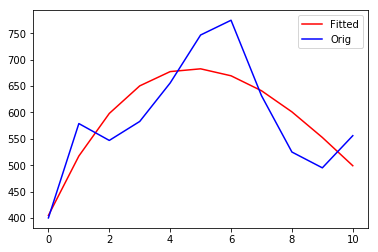

In [38]:
plt.plot(x_axis, poly_fit_values, "-r", label = "Fitted")
plt.plot(x_axis, kids_values, "-b", label = "Orig")
 
plt.legend(loc="upper right")